In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

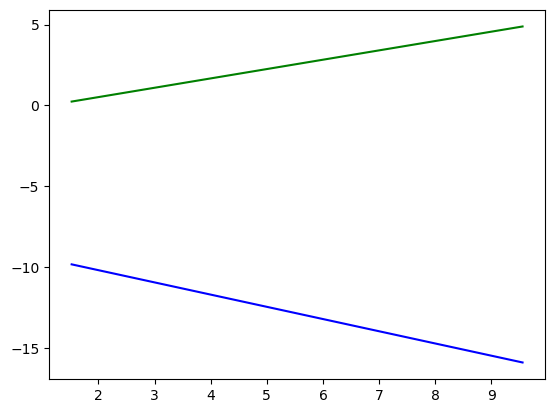

In [57]:
d = 10
r = np.random.RandomState(42)
x = r.uniform(1, 10, [d,])
x = np.sort(x)

y = 0.7 - 1.1*x + 0.2*x**2
m, s = np.mean(y), np.std(y)


noise = r.normal(m, s, [d,])
y = y + noise
y[5] = 100*y[5]

X = np.vstack([[np.ones(d)], [x]]).T

XTX = X.T@X
a = np.linalg.inv(XTX)@X.T@y

W = np.diag(1/(X@a - y)**2)
w = np.sqrt(W)

XTX = ((w@X).T)@(w@X)
a_robust = np.linalg.inv(XTX)@(X).T@(W@y)

#plt.scatter(x,y, color = 'red')
plt.plot(x, X@a, color = 'blue')
plt.plot(x, X@a_robust, color = 'green')